**Problem Definition**

전기 도금처리 시 전처리 공정의 산제 전처리 데이터에서 AI를 이용하여 분석하고 예측한다.


**시계열성 데이터**

제조 공정에서 발생하는 데이터를 크게 이미지 데이터와 시계열 데이터로 구분.
이미지 데이터는 인간의 육안으로도 확인 가능.
반면, 시계열 데이터는 반복적인 패턴으로 보이지만 표준적으로 정의하기 어려움.
또한, 여러 센서들로 수집된 복잡한 관련성을 이해하기 불가능한 고차원 데이터이기도 함.
따라서, 시각적으로는 표현할 수 없지만 x, y, z를 넘어서 유연하게 확장할 수 있는 시계열 데이터에 집중할 수밖에 없음

1. 데이터 불러와서 3가지 방법으로 코드 분석

In [142]:
# 데이터 불러오기
import pandas as pd
data = pd.read_csv('Assignment3.csv')

data

,date,LoT,pH,Temp,Process
0,2021-09-06 09:01:18,1,1.02,47.18,96.38
1,2021-09-06 09:01:23,1,1.05,47.34,96.38
2,2021-09-06 09:01:28,1,1.09,48.45,96.38
3,2021-09-06 09:01:33,1,1.12,48.46,96.38
4,2021-09-06 09:01:38,1,1.15,48.47,96.38
...,...,...,...,...,...
50089,2021-10-27 11:14:41,22,2.79,51.83,96.03
50090,2021-10-27 11:14:46,22,3.62,42.20,96.03
50091,2021-10-27 11:14:51,22,3.40,41.88,96.03
50092,2021-10-27 11:14:56,22,3.59,40.62,96.03


In [143]:
# 데이터의 상위 5개의 행 출력
data.head()

,date,LoT,pH,Temp,Process
0,2021-09-06 09:01:18,1,1.02,47.18,96.38
1,2021-09-06 09:01:23,1,1.05,47.34,96.38
2,2021-09-06 09:01:28,1,1.09,48.45,96.38
3,2021-09-06 09:01:33,1,1.12,48.46,96.38
4,2021-09-06 09:01:38,1,1.15,48.47,96.38


In [144]:
# 데이터에 대한 전반적인 정보 출력 (행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형)
data.info

<bound method DataFrame.info of                       date  LoT    pH   Temp  Process
0      2021-09-06 09:01:18    1  1.02  47.18    96.38
1      2021-09-06 09:01:23    1  1.05  47.34    96.38
2      2021-09-06 09:01:28    1  1.09  48.45    96.38
3      2021-09-06 09:01:33    1  1.12  48.46    96.38
4      2021-09-06 09:01:38    1  1.15  48.47    96.38
...                    ...  ...   ...    ...      ...
50089  2021-10-27 11:14:41   22  2.79  51.83    96.03
50090  2021-10-27 11:14:46   22  3.62  42.20    96.03
50091  2021-10-27 11:14:51   22  3.40  41.88    96.03
50092  2021-10-27 11:14:56   22  3.59  40.62    96.03
50093  2021-10-27 11:15:01   22  3.82  42.08    96.03

[50094 rows x 5 columns]>

In [145]:
# 데이터의 (행, 열)의 크기 확인
data.shape

(50094, 5)

2. 데이터의 시계열 특성 분석

<Axes: title={'center': 'Monthly Process'}, xlabel='date'>

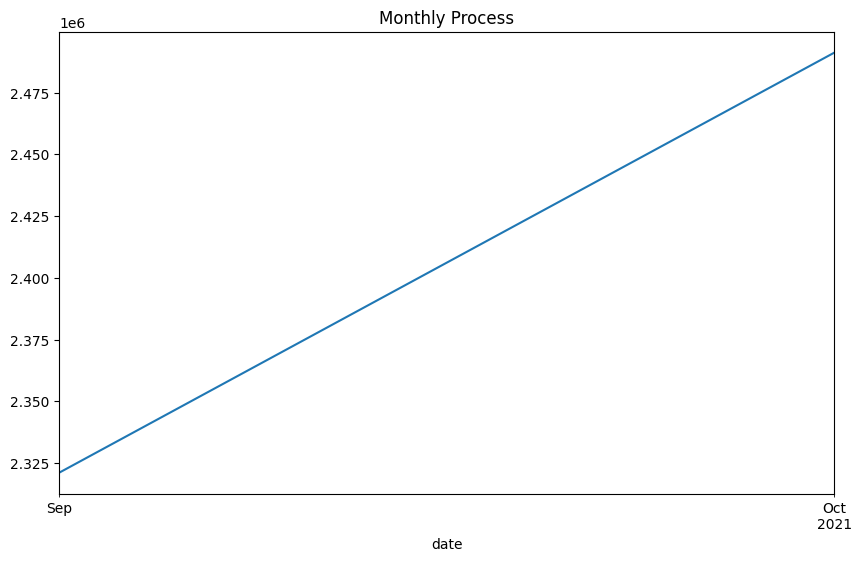

In [146]:
# 시계열 데이터로 변환
data['date'] = pd.to_datetime(data['date'])

# 날짜를 인덱스로 설정
data.set_index('date', inplace=True)

# 월별 데이터 합계 계산
monthly_data = data.resample('M').sum()

# 월별 데이터 시각화
monthly_data['Process'].plot(kind='line', figsize=(10, 6), title='Monthly Process')

3.  '2021-10-19'이 포함된 이후의 데이터를 test data로 하고 이전을 train data로 하여 train, test set을 분리. (test>= '2021-10-19', train< '2021-10-19')

In [63]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv("Assignment3.csv")

# 'Date' 열을 날짜 형식으로 변환
data['date'] = pd.to_datetime(data['date'])

# 데이터 분할
train_data = data[data['date'] < '2021-10-19']
test_data = data[data['date'] >= '2021-10-19']

# train 데이터 확인
print(train_data.head())

# test 데이터 확인
print(test_data.head())

                 date  LoT    pH   Temp  Process
0 2021-09-06 09:01:18    1  1.02  47.18    96.38
1 2021-09-06 09:01:23    1  1.05  47.34    96.38
2 2021-09-06 09:01:28    1  1.09  48.45    96.38
3 2021-09-06 09:01:33    1  1.12  48.46    96.38
4 2021-09-06 09:01:38    1  1.15  48.47    96.38
                     date  LoT    pH   Temp  Process
39468 2021-10-19 09:01:10    1  1.08  47.64    82.44
39469 2021-10-19 09:01:15    1  1.12  47.85    82.44
39470 2021-10-19 09:01:20    1  1.12  48.07    82.44
39471 2021-10-19 09:01:25    1  1.14  48.07    82.44
39472 2021-10-19 09:01:30    1  1.15  48.12    82.44


4. Deep learning의 regression모델과 SimpleRnn모델을 사용하고 다음의 조건을 따라 예측 모델 을 만들고 비교 검증

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# 데이터 불러오기
data = pd.read_csv("Assignment3.csv")

# 종속변수와 독립변수 선택
X = data[['LoT', 'pH', 'Temp']].values
y = data['Process'].values

In [147]:
# Standard Scaling 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Train-Test 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
# 딥러닝 (DNN 모델)
model_dnn = Sequential()
model_dnn.add(Dense(64, activation='relu', input_shape=(3,)))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(1))
model_dnn.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model_dnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# 예측
y_pred_dnn = model_dnn.predict(X_test)

# MAE 계산
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)

# RMAE 계산
rmae_dnn = np.sqrt(mean_absolute_error(y_test, y_pred_dnn))

# MAPE 계산
mape_dnn = np.mean(np.abs((y_test - y_pred_dnn) / y_test)) * 100

print("DNN 모델 평가 결과:")
print("MAE:", mae_dnn)
print("RMAE:", rmae_dnn)
print("MAPE:", mape_dnn)

314/314 [==============================] - 0s 749us/step
DNN 모델 평가 결과:
MAE: 1.4234791380507896
RMAE: 1.1930964496011165
MAPE: 2.0845189558882113


In [68]:
# 딥러닝 (RNN 모델)
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(1, 3)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=0)

# 예측
y_pred_rnn = model_rnn.predict(X_test_rnn)

# MAE 계산
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)

# RMAE 계산
rmae_rnn = np.sqrt(mean_absolute_error(y_test, y_pred_rnn))

# MAPE 계산
mape_rnn = np.mean(np.abs((y_test - y_pred_rnn) / y_test)) * 100

print("SimpleRNN 모델 평가 결과:")
print("MAE:", mae_rnn)
print("RMAE:", rmae_rnn)
print("MAPE:", mape_rnn)

314/314 [==============================] - 0s 1ms/step
SimpleRNN 모델 평가 결과:
MAE: 1.64846186453502
RMAE: 1.283924399851884
MAPE: 2.2146559852106042


In [94]:
# 딥러닝 (LSTM)
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 입력 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# LSTM 모델의 입력 형태와 일치하도록 입력 데이터 재조정
reshaped_X_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

# y_train을 reshaped_X_train의 형태와 일치하도록 재조정
reshaped_y_train = np.reshape(y_train, (y_train.shape[0], 1))

# LSTM 모델 정의
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='relu', input_shape=(1, 3)))
model_lstm.add(Dense(100, activation='relu'))
model_lstm.add(Dense(1))

# 모델 컴파일
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model_lstm.fit(reshaped_X_train, reshaped_y_train, epochs=14, batch_size=32)

# 예측
y_pred_lstm = model_lstm.predict(reshaped_X_train)

# 평가지표 계산
mae_lstm = mean_absolute_error(reshaped_y_train, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(reshaped_y_train, y_pred_lstm))
mape_lstm = np.mean(np.abs((reshaped_y_train - y_pred_lstm) / reshaped_y_train)) * 100

# 결과 출력
print("LSTM 모델 평가:")
print("MAE: {:.4f}".format(mae_lstm))
print("RMSE: {:.4f}".format(rmse_lstm))
print("MAPE: {:.4f}%".format(mape_lstm))


Epoch 1/14
1253/1253 [==============================] - 4s 2ms/step - loss: 1079.4924
Epoch 2/14
1253/1253 [==============================] - 3s 2ms/step - loss: 8.0674
Epoch 3/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.6520
Epoch 4/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.5099
Epoch 5/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.4953
Epoch 6/14
1253/1253 [==============================] - 3s 2ms/step - loss: 7.3600
Epoch 7/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.2995
Epoch 8/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.2383
Epoch 9/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.2183
Epoch 10/14
1253/1253 [==============================] - 3s 2ms/step - loss: 7.1912
Epoch 11/14
1253/1253 [==============================] - 3s 2ms/step - loss: 7.1487
Epoch 12/14
1253/1253 [==============================] - 2s 2ms/step - loss: 7.154

5. 한번의 작업(temp,pH)을 하나의 matrix형태로 변환
(69행을 하나의 matrix로 묶지는 못했음)

In [149]:
import numpy as np

# temp와 pH 데이터 추출
temp_data = data['Temp'].values
ph_data = data['pH'].values

# 한 번의 작업을 하나의 matrix 형태로 변환
combined_data = np.vstack((temp_data, ph_data)).T

# 변환된 데이터 확인
print(combined_data)


[[47.18  1.02]
 [47.34  1.05]
 [48.45  1.09]
 ...
 [41.88  3.4 ]
 [40.62  3.59]
 [42.08  3.82]]


6. 위의 4번을 새로운 데이터에 반복 작업

In [152]:
# 딥러닝 (DNN, RNN)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(combined_data, data['Process'].values, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DNN 모델 생성
model_dnn = Sequential()
model_dnn.add(Dense(64, activation='relu', input_shape=(2,)))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(1))
model_dnn.compile(loss='mean_squared_error', optimizer='adam')

# RNN 모델 생성
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(1, 2)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

# DNN 모델 학습
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# RNN 모델 학습
model_rnn.fit(X_train_scaled.reshape((-1, 1, 2)), y_train, epochs=10, batch_size=32, verbose=0)

# DNN 모델 예측
y_pred_dnn = model_dnn.predict(X_test_scaled)

# RNN 모델 예측
y_pred_rnn = model_rnn.predict(X_test_scaled.reshape((-1, 1, 2)))

# 성능 평가
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
rmse_dnn = np.sqrt(mean_squared_error(y_test, y_pred_dnn))
mape_dnn = mean_absolute_percentage_error(y_test, y_pred_dnn)

mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
mape_rnn = mean_absolute_percentage_error(y_test, y_pred_rnn)

print("DNN 모델 평가 결과:")
print("MAE:", mae_dnn)
print("RMSE:", rmse_dnn)
print("MAPE:", mape_dnn)

print("RNN 모델 평가 결과:")
print("MAE:", mae_rnn)
print("RMSE:", rmse_rnn)
print("MAPE:", mape_rnn)


314/314 [==============================] - 1s 2ms/step
DNN 모델 평가 결과:
MAE: 1.33849962229357
RMSE: 3.28451460436591
MAPE: 0.01512050495040152
RNN 모델 평가 결과:
MAE: 1.52105079383595
RMSE: 3.2273283807446402
MAPE: 0.016917100900047426


In [153]:
# 딥러닝 (LSTM)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(combined_data, data['Process'].values, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 모델 생성
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(1, 2)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# LSTM 모델 학습
model_lstm.fit(X_train_scaled.reshape((-1, 1, 2)), y_train, epochs=10, batch_size=32, verbose=0)

# LSTM 모델 예측
y_pred_lstm = model_lstm.predict(X_test_scaled.reshape((-1, 1, 2)))

# 성능 평가
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

print("LSTM 모델 평가 결과:")
print("MAE:", mae_lstm)
print("RMSE:", rmse_lstm)
print("MAPE:", mape_lstm)


314/314 [==============================] - 1s 1ms/step
LSTM 모델 평가 결과:
MAE: 1.4824207519202288
RMSE: 3.236572622749457
MAPE: 0.016512404965431663


**4번의 결과값**

- DNN 모델 평가 결과: MAE: 1.42 / RMAE: 1.19 / MAPE: 2.08

- SimpleRNN 모델 평가 결과: MAE: 1.64 / RMAE: 1.28 / MAPE: 2.21

- LSTM 모델 평가 결과: MAE: 1.44 / RMSE: 2.62 / MAPE: 1.56



**데이터 셋 변경 후 결과값**

- DNN 모델 평가 결과: MAE: 1.33 / RMSE: 3.28 / MAPE: 0.01

- RNN 모델 평가 결과: MAE: 1.52 / RMSE: 3.22 / MAPE: 0.01

- LSTM 모델 평가 결과: MAE: 1.41 / RMSE: 3.24 / MAPE: 0.01

**7. 데이터 셋에 따라서 결과가 다르게 나오는 이유**

데이터 셋이 변함에 따라 데이터의 양, 분포, 패턴 찾기 등 다양한 이유로 결과값이 달라질 수 있다. 특히 이번 프로젝트에서,
Q5 이전인 시계열 데이터에서는 각 시간별로 온도와 pH 값이 기록되어 있어 시간에 따른 패턴이나 추세를 분석할 수 있었다. 따라서, 시계열 데이터를 활용한 시계열 분석 기법이 적용될 수 있었다.

하지만 Q5 이후에는 데이터가 한 번의 작업 단위로 변환되어 각 작업에 대한 온도와 pH 값만을 가지고 있다. 따라서, 시계열적인 특성을 고려하는 분석보다는 작업 단위의 특성을 고려한 분석이 적합해졌다. 예를 들어, 각 작업이 어떤 특징을 가지고 있는지, 작업 간의 차이나 변동성을 확인하는 등의 분석이 중요해진다.